In your `.gitignore`, add the following line:

`*creditcard.zip`

In [532]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

In [533]:
import seaborn
import matplotlib

from pathlib import Path
import glob
import logging  

from sklearn.preprocessing import KBinsDiscretizer


plt.rcParams['figure.figsize'] = (14,6)

# Class imbalance

- What is it?
- Why might we care about it?
- How can we deal with it?


## What is it?

In [534]:
for name in glob.glob('data/*.*'):
    print(name)

data/heart.csv
data/diabetes_yn.csv
data/heart.csv.xls
data/diabetes.csv
data/o2Saturation.csv.xls


In [535]:
##df = pd.read_csv('creditcard.zip', index_col=0)
##df.head()

In [536]:
heart = pd.read_csv('data/heart.csv.xls', index_col=0)

In [537]:
df = heart.copy()

In [538]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 303 entries, 63 to 57
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       303 non-null    int64  
 1   cp        303 non-null    int64  
 2   trtbps    303 non-null    int64  
 3   chol      303 non-null    int64  
 4   fbs       303 non-null    int64  
 5   restecg   303 non-null    int64  
 6   thalachh  303 non-null    int64  
 7   exng      303 non-null    int64  
 8   oldpeak   303 non-null    float64
 9   slp       303 non-null    int64  
 10  caa       303 non-null    int64  
 11  thall     303 non-null    int64  
 12  output    303 non-null    int64  
dtypes: float64(1), int64(12)
memory usage: 33.1 KB


In [539]:
df.shape

(303, 13)

<AxesSubplot:xlabel='output', ylabel='count'>

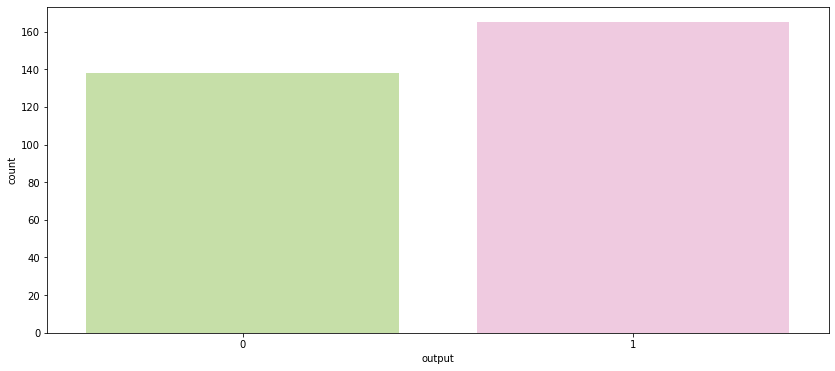

In [540]:
sns.countplot(x ='output', data = df, palette ="PiYG_r" )

In [541]:
#df = df.reset_index()
#df

In [ ]:
df.head()

In [543]:
df.columns

Index(['sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng',
       'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [544]:
df['output'].value_counts() #/ df.shape[0]

1    165
0    138
Name: output, dtype: int64

In [545]:
# df['Class'].value_counts() / df.shape[0]
df['output'].value_counts(normalize=True)

1    0.544554
0    0.455446
Name: output, dtype: float64

In [546]:
df.shape

(303, 13)

In [547]:
#chest_pain=pd.get_dummies(df['cp'],prefix='cp',drop_first=True)
#df=pd.concat([df,chest_pain],axis=1)
#df.drop(['cp'],axis=1,inplace=True)
#sp=pd.get_dummies(df['slp'],prefix='slope')
#th=pd.get_dummies(df['thall'],prefix='thall')
#rest_ecg=pd.get_dummies(df['restecg'],prefix='restecg')
#frames=[df,sp,th,rest_ecg]
#df=pd.concat(frames,axis=1)
#df.drop(['slp','thall','restecg'],axis=1,inplace=True)

In [548]:
 df

,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
age,,,,,,,,,,,,,
63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
68,1,0,144,193,1,1,141,0,3.4,1,2,3,0


## Why is it a Problem?

- Because the classifier has an "incentive" to rather predict class 0. It just shows up so much more.
    - also depends a bit on the model.

## How can we deal with it?

In [549]:
def print_evaluations(ytrue, ypred, model):
    print(f'How does model {model} score:')
    print(f'The accuracy of the model is: {round(accuracy_score(ytrue, ypred), 3)}')
    print(f'The precision of the model is: {round(precision_score(ytrue, ypred), 3)}')
    print(f'The recall of the model is: {round(recall_score(ytrue, ypred), 3)}')
    print(f'The f1-score of the model is: {round(f1_score(ytrue, ypred), 3)}')
    
    #print confusion matrix
    fig = plt.figure(figsize=(6, 6))
    cm = confusion_matrix(ytrue, ypred)
    print(cm)
    
    #plot the heatmap
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    # labels, title and ticks
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['no heart diseases', 'heart diseases']); 
    ax.yaxis.set_ticklabels(['no heart diseases', 'heart diseases'])

In [550]:
X = df.iloc[:,:-1] #all rows (:), and all columns EXCEPT for the last one
# X = df[df.columns[df.columns != 'Class']] #Alternative

y = df['output']

# Split the data

In [551]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227, 12), (76, 12), (227,), (76,))

How does model Decision tree classifier  score:
The accuracy of the model is: 0.903
The precision of the model is: 0.875
The recall of the model is: 0.96
The f1-score of the model is: 0.915
[[ 86  17]
 [  5 119]]


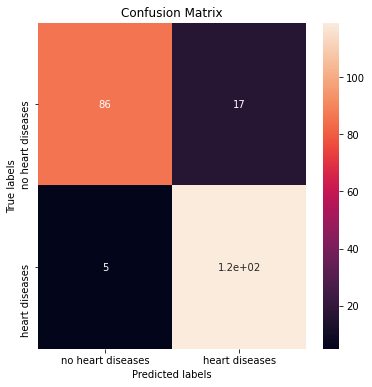

In [552]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

mtr = DecisionTreeClassifier(max_depth=4)   #Hyperparameters -> there are many more you can try out against overfitting

mtr.fit(X_train, y_train)
y_pred = mtr.predict(X_train)   # prediction
mtr.score(X_train, y_train)

print_evaluations(y_train, y_pred, 'Decision tree classifier ')

# Logistic Regression (a)

In [553]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing


In [554]:
# normalization of the datset
X = preprocessing.StandardScaler().fit(X).transform(X)
  
# Train-and-Test -Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( 
        X, y, test_size = 0.3, random_state = 4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (212, 12) (212,)
Test set: (91, 12) (91,)


In [555]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


In [556]:
#from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import jaccard_score

In [557]:
# Evaluation and accuracy
print('')
print('Accuracy of the model in jaccard similarity score is = ', 
      jaccard_score(y_test, y_pred))


Accuracy of the model in jaccard similarity score is =  0.7142857142857143


How does model Jacard LogReg score:
The accuracy of the model is: 0.802
The precision of the model is: 0.818
The recall of the model is: 0.849
The f1-score of the model is: 0.833
[[28 10]
 [ 8 45]]


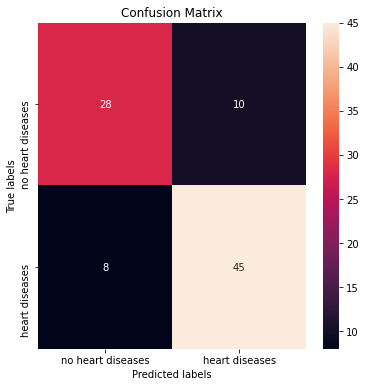

In [558]:
print_evaluations(y_test, y_pred, 'Jacard LogReg')

In [559]:
#from sklearn.metrics import jaccard_similarity_score

# Logistic Regression (b)

In [560]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression() # <-- here we could set hyperparamters
model.fit(X_train, y_train)

# inspect a, b
clg = model.coef_, model.intercept_  # parameters have a _ in scikit

In [561]:
clg

(array([[-0.82117302,  0.71489381, -0.43056486, -0.13612921,  0.13902054,
          0.42974478,  0.45079198, -0.47780098, -0.79440337,  0.44665885,
         -0.89791921, -0.7038766 ]]),
 array([0.10155203]))

In [562]:
 model.score(X_train, y_train) ,   model.score(X_test, y_test)  

(0.8726415094339622, 0.8021978021978022)

How does model LogReg score:
The accuracy of the model is: 0.802
The precision of the model is: 0.818
The recall of the model is: 0.849
The f1-score of the model is: 0.833
[[28 10]
 [ 8 45]]


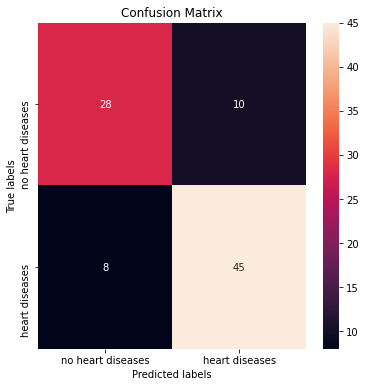

In [563]:
print_evaluations(y_test, y_pred, 'LogReg')

In [564]:
#pd.DataFrame(model.predict(X))

In [565]:
#from sklearn.model_selection import cross_val_score

#model = LogisticRegression()
#accuracy = cross_val_score(model, X, y, cv=5, scoring='accuracy')
#print("cross-validation scores", accuracy)

In [566]:
X

array([[ 0.68100522,  1.97312292,  0.76395577, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [ 0.68100522,  1.00257707, -0.09273778, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.46841752,  0.03203122, -0.09273778, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 0.68100522, -0.93851463,  0.70684287, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.68100522, -0.93851463, -0.09273778, ..., -0.64911323,
         0.26508221,  1.12302895],
       [-1.46841752,  0.03203122, -0.09273778, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [567]:
model.predict(X_train)

array([0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1])

In [568]:
#prob_reg= model.predict_proba(X_train)

In [569]:
X_train

array([[ 0.68100522, -0.93851463,  0.47839125, ..., -2.27457861,
        -0.71442887,  1.12302895],
       [ 0.68100522, -0.93851463,  0.02148802, ..., -0.64911323,
         0.26508221, -2.14887271],
       [ 0.68100522,  1.00257707, -0.09273778, ...,  0.97635214,
         2.22410436, -0.51292188],
       ...,
       [ 0.68100522, -0.93851463, -0.3783023 , ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.68100522, -0.93851463, -0.09273778, ..., -0.64911323,
         1.24459328,  1.12302895],
       [-1.46841752,  1.00257707, -1.12077005, ...,  0.97635214,
        -0.71442887, -0.51292188]])

In [570]:
df.columns

Index(['sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng',
       'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

# Train the model decison tree

How does model Decision tree classifier  score:
The accuracy of the model is: 0.925
The precision of the model is: 0.944
The recall of the model is: 0.911
The f1-score of the model is: 0.927
[[ 94   6]
 [ 10 102]]


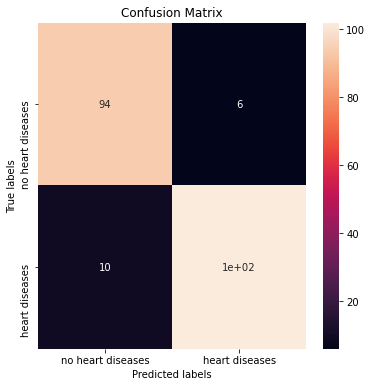

In [571]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

mtr = DecisionTreeClassifier(max_depth=4)   #Hyperparameters -> there are many more you can try out against overfitting

mtr.fit(X_train, y_train)
y_pred = mtr.predict(X_train)   # prediction
mtr.score(X_train, y_train)

print_evaluations(y_train, y_pred, 'Decision tree classifier ')



In [572]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree


In [573]:
mtr = DecisionTreeClassifier(max_depth=4)   #Hyperparameters -> there are many more you can try out against overfitting

In [574]:
mtr.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [575]:
y_pred = mtr.predict(X_train)   # prediction

In [576]:
y_pred

array([0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1])

In [577]:
mtr.score(X_train, y_train)

0.9245283018867925

How does model Decision tree classifier  score:
The accuracy of the model is: 0.925
The precision of the model is: 0.944
The recall of the model is: 0.911
The f1-score of the model is: 0.927
[[ 94   6]
 [ 10 102]]


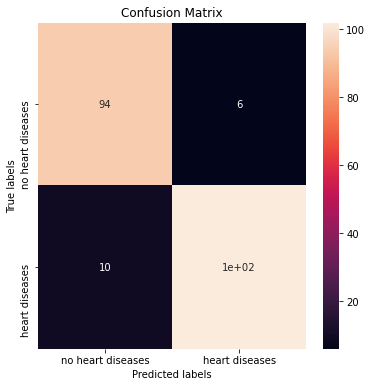

In [578]:
print_evaluations(y_train, y_pred, 'Decision tree classifier ')

In [579]:
df.columns

Index(['sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng',
       'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

[Text(355.725, 293.54400000000004, 'caa <= -0.225\ngini = 0.498\nsamples = 212\nvalue = [100, 112]\nclass = diseases'),
 Text(153.45000000000002, 228.312, 'thall <= 0.305\ngini = 0.347\nsamples = 112\nvalue = [25, 87]\nclass = diseases'),
 Text(83.7, 163.08000000000004, 'oldpeak <= 1.519\ngini = 0.171\nsamples = 85\nvalue = [8, 77]\nclass = diseases'),
 Text(55.800000000000004, 97.84800000000001, 'thalachh <= -2.893\ngini = 0.115\nsamples = 82\nvalue = [5, 77]\nclass = diseases'),
 Text(27.900000000000002, 32.61600000000004, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = no diseases'),
 Text(83.7, 32.61600000000004, 'gini = 0.094\nsamples = 81\nvalue = [4, 77]\nclass = diseases'),
 Text(111.60000000000001, 97.84800000000001, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = no diseases'),
 Text(223.20000000000002, 163.08000000000004, 'oldpeak <= -0.293\ngini = 0.466\nsamples = 27\nvalue = [17, 10]\nclass = no diseases'),
 Text(167.4, 97.84800000000001, 'thalachh <= 1.196\ngini = 0.3

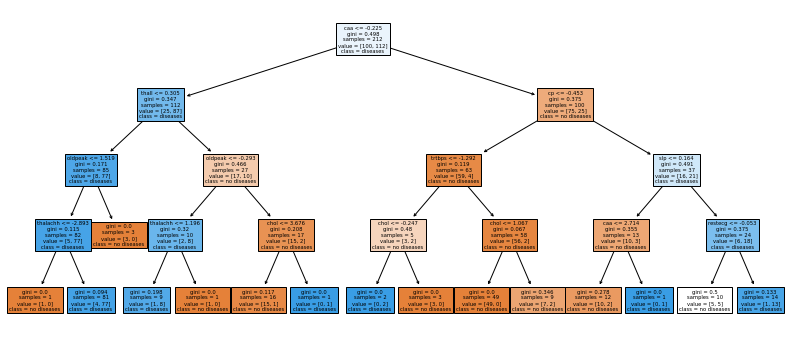

In [580]:
plot_tree(mtr, feature_names=['sex','cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng',
       'oldpeak', 'slp', 'caa', 'thall'], class_names=['no diseases','diseases'], filled =True  )


#### Build a simple baseline model

In [581]:
ypred_baseline = [1] * len(y_train.values)
#generating predictions of all zero, i.e. the model guesses NOT FRAUD for all cases.

How does model Baseline Model score:
The accuracy of the model is: 0.528
The precision of the model is: 0.528
The recall of the model is: 1.0
The f1-score of the model is: 0.691
[[  0 100]
 [  0 112]]


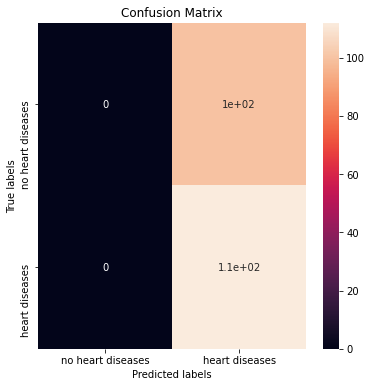

In [582]:
print_evaluations(y_train, ypred_baseline, 'Baseline Model')

#### Compare it to a random forest classifier

In [583]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=20, max_depth=3, random_state=10)

In [584]:
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=20, random_state=10)

In [585]:
ypred_rf = rf.predict(X_test)

In [586]:
ypred_rf

array([1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1])

How does model RandomForest score:
The accuracy of the model is: 0.813
The precision of the model is: 0.821
The recall of the model is: 0.868
The f1-score of the model is: 0.844
[[28 10]
 [ 7 46]]


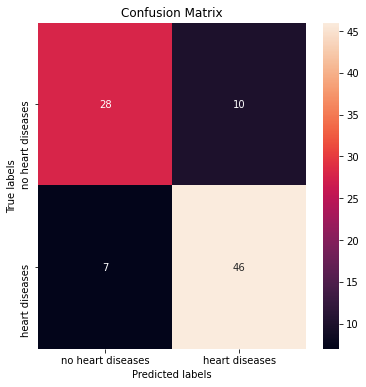

In [587]:
print_evaluations(y_test, ypred_rf, 'RandomForest')

# New 

In [588]:
X = df.iloc[:,:-1] #all rows (:), and all columns EXCEPT for the last one
# X = df[df.columns[df.columns != 'Class']] #Alternative

y = df['output']

In [589]:
df.shape

(303, 13)

In [590]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((227, 12), (76, 12), (227,), (76,))

In [591]:
103+124

227

### Methods to improve: Use Undersampling

In [592]:
# !pip install imbalanced-learn

In [593]:
from imblearn.under_sampling import RandomUnderSampler, NearMiss

In [594]:
(y_train == 0).sum(), (y_train == 1).sum()

(103, 124)

Instantiating the models:
- just declaring them with their hyperparameters.

In [595]:
rus = RandomUnderSampler(sampling_strategy={0:95},random_state=10)
# we are asking for 95 data points out of 103 in the first class.

nm = NearMiss(sampling_strategy={0: 95})

Actually do the transformation, i.e. resampling:

In [596]:
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train) #fit_resample() new imblearn syntax
#very conceptually similar to .fit_transform() <---sklearn

X_train_nm, y_train_nm = nm.fit_resample(X_train, y_train) 



In [597]:
X_train_rus.shape #20,000 non-frauds and 369 frauds. As opposed to 213,000 non-frauds.

(219, 12)

In [598]:
### Exact same code as before, but this time we are training the Random Forest on the undersampled  / down-sampled
rf.fit(X_train_rus, y_train_rus)
ypred_rus = rf.predict(X_test)

How does model Random Undersampling score:
The accuracy of the model is: 0.868
The precision of the model is: 0.878
The recall of the model is: 0.878
The f1-score of the model is: 0.878
[[30  5]
 [ 5 36]]


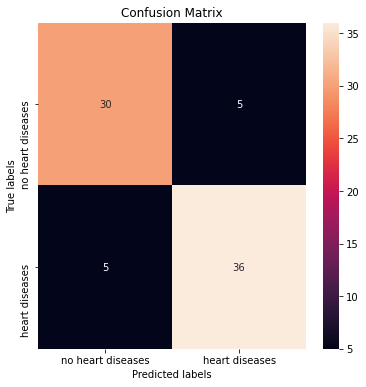

In [599]:
print_evaluations(y_test, ypred_rus, 'Random Undersampling')

In `sklearn`, there are 2 types of "models":
1. Transformative / Feature Engineering models
    - scalers
    - binners
    - interpolators
    - polynomial features
    - they all use the `.fit()` and the `.transform()` methods.
2. Predictive Models
    - Tree-based models
    - Linear Models
    - Support vector machines
    - they all use the `.fit()` and the `.predict()` methods.

How does model Near Miss score:
The accuracy of the model is: 0.842
The precision of the model is: 0.872
The recall of the model is: 0.829
The f1-score of the model is: 0.85
[[30  5]
 [ 7 34]]


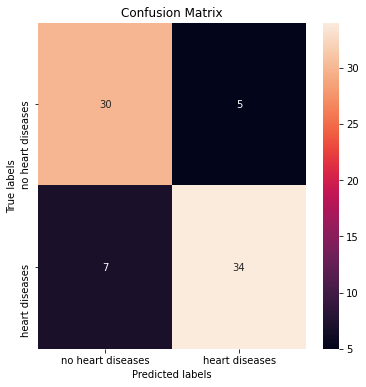

In [600]:
### Exact same code as before, but this time we are training the Random Forest on the undersampled  / down-sampled data using Near Miss
rf.fit(X_train_nm, y_train_nm)
ypred_nm = rf.predict(X_test)
print_evaluations(y_test, ypred_nm, 'Near Miss')

### Use Oversampling

In [601]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

#### Random over sampling with replacement

In [602]:
# Oversample to 20000
ros = RandomOverSampler(random_state=10, sampling_strategy={1: 520}) #"up-sampling" the minority class to have 20_000 samples (up from 369)

In [603]:
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (520) in class 1 will be larger than the number of samples in the majority class (class #1 -> 124)
  warnings.warn(


In [604]:
X_train_ros.shape, X_train.shape
#the oversampled dataframe now has  more rows than before.

((623, 12), (227, 12))

How does model Random Oversampling score:
The accuracy of the model is: 0.724
The precision of the model is: 0.672
The recall of the model is: 0.951
The f1-score of the model is: 0.788
[[16 19]
 [ 2 39]]


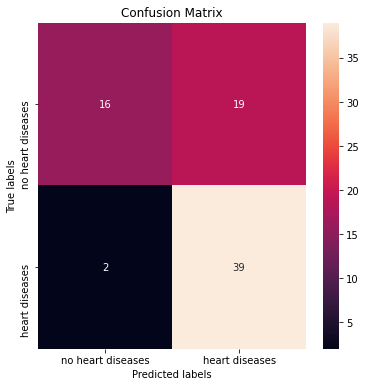

In [605]:
### Exact same code as before, but this time we are training the Random Forest on the undersampled  / down-sampled data using Near Miss
rf.fit(X_train_ros, y_train_ros)
ypred_ros = rf.predict(X_test)
print_evaluations(y_test, ypred_ros, 'Random Oversampling')

#### Synthetic Minority Over Sampling

Random factor times the distance to the Nearest Neighbour is used to generate new data point.

/opt/anaconda3/lib/python3.8/site-packages/imblearn/utils/_validation.py:299: UserWarning: After over-sampling, the number of samples (2500) in class 1 will be larger than the number of samples in the majority class (class #1 -> 124)
  warnings.warn(


How does model SMOTE score:
The accuracy of the model is: 0.724
The precision of the model is: 0.667
The recall of the model is: 0.976
The f1-score of the model is: 0.792
[[15 20]
 [ 1 40]]


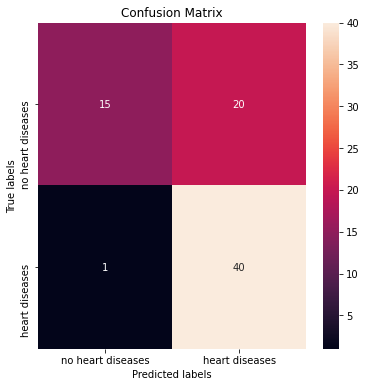

In [606]:
sm = SMOTE(sampling_strategy={1: 2500}, random_state=10)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)

rf.fit(X_train_smote, y_train_smote)
ypred_smote = rf.predict(X_test)
print_evaluations(y_test, ypred_smote, 'SMOTE')

How to use this stuff in this week's project:
- Still split your data into train/test!
- Still need to vectorize your data, e.g. CountVectorizer + TfIdfTransformer
- then you can apply any sampling technique you'd like in order to better balance the classes (this is part of feature engineering!)
- then validate your results!

Models you can try out this week:
- Some probabilistic models (e.g. Naive Bayes) are SUPER SENSITIVE to class imbalance, although works well with many features.
- Logistic Regression and RFs do pretty okay with imbalanced classes, but it still helps.

Resampling / Balancing your classes most likely will not hurt! If anything, it will increase your model's performance.

# ANN

In [607]:
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.utils.vis_utils import plot_model

from tensorflow.keras import Model
from sklearn.model_selection import train_test_split
from keras import models    
from tensorflow.keras.utils import plot_model


#from keras.layers import Dense


from tensorflow.keras.models import load_model

from IPython.display import SVG
 
from sklearn.model_selection import KFold 
KFold

sklearn.model_selection._split.KFold

In [608]:
X = df.iloc[:,:-1] #all rows (:), and all columns EXCEPT for the last one
# X = df[df.columns[df.columns != 'Class']] #Alternative

y = df['output']

In [609]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [610]:


sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [611]:
X_test

array([[ 0.69617712, -0.92274852,  0.77251645, -1.36354075, -0.41803981,
         0.90163913, -1.07375268,  1.40984195,  1.2900049 , -2.27916533,
        -0.70710678,  1.14190596],
       [ 0.69617712,  1.94013791,  2.23625729, -0.3703119 , -0.41803981,
        -0.97936664,  0.22375805, -0.70929937, -0.38883987, -0.66169316,
        -0.70710678,  1.14190596],
       [ 0.69617712,  1.94013791,  2.23625729,  0.7728383 , -0.41803981,
        -0.97936664,  0.39675948, -0.70929937, -0.72460883, -0.66169316,
        -0.70710678,  1.14190596],
       [ 0.69617712, -0.92274852, -0.39847623,  0.21063328, -0.41803981,
        -0.97936664, -0.38174696,  1.40984195,  1.45788938, -0.66169316,
         0.26516504,  1.14190596],
       [ 0.69617712,  0.98584243, -0.10572806, -0.29535123, -0.41803981,
         0.90163913, -0.16549517, -0.70929937,  0.61846699, -0.66169316,
         2.20970869,  1.14190596],
       [ 0.69617712, -0.92274852, -0.45702586,  0.51047596, -0.41803981,
        -0.97936664,  

In [612]:
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((242, 12), (242,)), ((61, 12), (61,)))

# Import Keras

In [613]:
#pip install keras


In [614]:
classifier = Sequential()
classifier.add(Dense(activation = "elu", input_dim = 12, 
                     units = 8, kernel_initializer = "uniform"))
classifier.add(Dense(activation = "elu", units = 13, 
                     kernel_initializer = "uniform"))
classifier.add(Dense(activation = "sigmoid", units = 1, 
                     kernel_initializer = "uniform"))
classifier.compile(optimizer = 'adam' , loss = 'binary_crossentropy', 
                   metrics = ['accuracy'] )

In [615]:
hist= classifier.fit(X_train , y_train , batch_size = 10, epochs =200, validation_split=0.2)

Epoch 1/200
20/20 [==============================] - 11s 30ms/step - loss: 0.6924 - accuracy: 0.6399 - val_loss: 0.6907 - val_accuracy: 0.5510
Epoch 2/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6883 - accuracy: 0.6263 - val_loss: 0.6781 - val_accuracy: 0.7551
Epoch 3/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6717 - accuracy: 0.7844 - val_loss: 0.6391 - val_accuracy: 0.8367
Epoch 4/200
20/20 [==============================] - 0s 2ms/step - loss: 0.6299 - accuracy: 0.8168 - val_loss: 0.5666 - val_accuracy: 0.8367
Epoch 5/200
20/20 [==============================] - 0s 2ms/step - loss: 0.5543 - accuracy: 0.8329 - val_loss: 0.4825 - val_accuracy: 0.8367
Epoch 6/200
20/20 [==============================] - 0s 2ms/step - loss: 0.4777 - accuracy: 0.8201 - val_loss: 0.4204 - val_accuracy: 0.8367
Epoch 7/200
20/20 [==============================] - 0s 3ms/step - loss: 0.4173 - accuracy: 0.8509 - val_loss: 0.3824 - val_accuracy: 0.8367
Epoch 8/200

Epoch 116/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3843 - accuracy: 0.8187 - val_loss: 0.3315 - val_accuracy: 0.8367
Epoch 117/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3442 - accuracy: 0.8303 - val_loss: 0.3310 - val_accuracy: 0.8367
Epoch 118/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3679 - accuracy: 0.8416 - val_loss: 0.3287 - val_accuracy: 0.8367
Epoch 119/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3499 - accuracy: 0.8608 - val_loss: 0.3301 - val_accuracy: 0.8367
Epoch 120/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3189 - accuracy: 0.8594 - val_loss: 0.3298 - val_accuracy: 0.8367
Epoch 121/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3770 - accuracy: 0.8404 - val_loss: 0.3293 - val_accuracy: 0.8367
Epoch 122/200
20/20 [==============================] - 0s 2ms/step - loss: 0.3666 - accuracy: 0.8284 - val_loss: 0.3302 - val_accuracy: 0.8367

In [616]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 104       
_________________________________________________________________
dense_1 (Dense)              (None, 13)                117       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 14        
Total params: 235
Trainable params: 235
Non-trainable params: 0
_________________________________________________________________


In [617]:
classifier.evaluate(X_train,y_train)

8/8 [==============================] - 0s 873us/step - loss: 0.3190 - accuracy: 0.8595


[0.3190000653266907, 0.8595041036605835]

In [618]:
classifier.predict(X_train)

array([[9.91186380e-01],
       [9.33037281e-01],
       [9.48862076e-01],
       [8.14001143e-01],
       [5.72800517e-01],
       [5.87467492e-01],
       [1.18304610e-01],
       [7.84206867e-01],
       [6.24338388e-01],
       [3.98119092e-01],
       [9.70724225e-01],
       [7.99818397e-01],
       [2.75256038e-02],
       [5.29294610e-02],
       [8.10077190e-01],
       [9.24911201e-02],
       [5.74854076e-01],
       [8.05074811e-01],
       [3.92888695e-01],
       [1.06160045e-02],
       [4.62231636e-02],
       [1.18693411e-01],
       [2.99512684e-01],
       [4.44988608e-02],
       [2.65293539e-01],
       [5.54059744e-02],
       [6.40970707e-01],
       [7.69741774e-01],
       [4.26604748e-01],
       [3.06682587e-02],
       [8.26108456e-01],
       [5.60755670e-01],
       [3.13548744e-02],
       [9.77591634e-01],
       [1.62285179e-01],
       [1.41863137e-01],
       [1.88718438e-02],
       [9.68017220e-01],
       [4.84184325e-02],
       [1.52362585e-02],


In [619]:
hist.history

{'loss': [0.6919004321098328,
  0.6853097677230835,
  0.6620401740074158,
  0.6085081696510315,
  0.5338985323905945,
  0.4617677330970764,
  0.4157421886920929,
  0.3910509943962097,
  0.3806321620941162,
  0.37557515501976013,
  0.37273019552230835,
  0.3706279993057251,
  0.36805182695388794,
  0.36706605553627014,
  0.36651214957237244,
  0.3654029667377472,
  0.3641209602355957,
  0.36322739720344543,
  0.3628305494785309,
  0.36312827467918396,
  0.36257702112197876,
  0.3615730106830597,
  0.3620699644088745,
  0.36072808504104614,
  0.360847145318985,
  0.36016181111335754,
  0.36093637347221375,
  0.36096277832984924,
  0.36068055033683777,
  0.3601544499397278,
  0.35997310280799866,
  0.35925567150115967,
  0.35967689752578735,
  0.3595302104949951,
  0.3587392270565033,
  0.3587093949317932,
  0.3591291904449463,
  0.35778433084487915,
  0.35822466015815735,
  0.35863593220710754,
  0.35796719789505005,
  0.3579752743244171,
  0.357907235622406,
  0.35735076665878296,
  0.3

In [620]:
#plt.plot(hist.history['loss'])
#plt.plot(hist.history['val_loss'])

<AxesSubplot:>

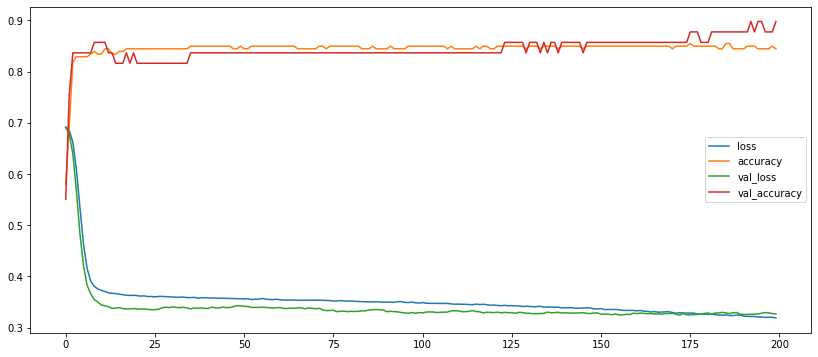

In [621]:
pd.DataFrame(hist.history).plot()

In [622]:
#plt.plot(hist.history['accuracy'])
#plt.plot(hist.history['val_accuracy'])

In [623]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [624]:
cm = confusion_matrix(y_test,y_pred)
cm

array([[22,  5],
       [ 5, 29]])

In [625]:
accuracy = (cm[0][0]+cm[1][1])/(cm[0][1] + cm[1][0] +cm[0][0] +cm[1][1])
print(accuracy*100)

83.60655737704919


How does model ANN score:
The accuracy of the model is: 0.836
The precision of the model is: 0.853
The recall of the model is: 0.853
The f1-score of the model is: 0.853
[[22  5]
 [ 5 29]]


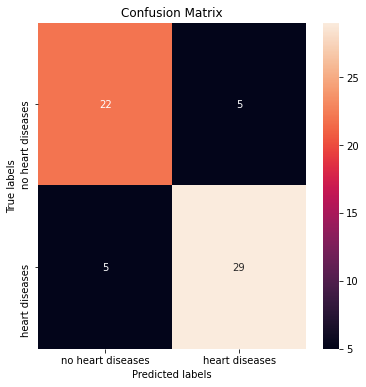

In [626]:
print_evaluations(y_test, y_pred, 'ANN')

In [627]:
classifier.get_weights()

[array([[-0.3603898 , -0.26809478, -0.02232407, -0.2149682 , -0.06149188,
         -0.12931043, -0.2969283 , -0.39386773],
        [ 0.12183288,  0.00590229, -0.37774968,  0.09490937, -0.19423683,
         -0.41574052,  0.09479546,  0.05737486],
        [ 0.0414429 , -0.11955973, -0.00609483,  0.00876023,  0.14752947,
          0.09325884,  0.02542422, -0.16261886],
        [ 0.12666428, -0.07227533,  0.00256274,  0.01347588,  0.08007652,
          0.0263181 ,  0.07420629,  0.07638595],
        [ 0.13576402,  0.08438637,  0.26134914,  0.11335439,  0.24702975,
          0.2515575 ,  0.09312797, -0.06983633],
        [-0.08727752, -0.02309263, -0.20065367, -0.15902476,  0.05284054,
         -0.11052427, -0.15451272,  0.19923742],
        [ 0.30514294,  0.22839065,  0.26824215,  0.25024682,  0.07413047,
          0.29483518,  0.20692492,  0.2938522 ],
        [-0.16874434,  0.10873328,  0.17598094,  0.02417634,  0.2528206 ,
          0.2617071 , -0.10133024, -0.06668205],
        [ 0.0373

In [628]:
#!pip install h5py

In [629]:
# serialize model
classifier.save("model.h5")
print("Saved model to disk")

Saved model to disk


In [630]:
network = models.load_model('model.h5')

In [631]:
 network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 104       
_________________________________________________________________
dense_1 (Dense)              (None, 13)                117       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 14        
Total params: 235
Trainable params: 235
Non-trainable params: 0
_________________________________________________________________


# save a list of np.arrays with the weights

In [632]:
w = network.get_weights()

In [633]:
w

[array([[-0.3603898 , -0.26809478, -0.02232407, -0.2149682 , -0.06149188,
         -0.12931043, -0.2969283 , -0.39386773],
        [ 0.12183288,  0.00590229, -0.37774968,  0.09490937, -0.19423683,
         -0.41574052,  0.09479546,  0.05737486],
        [ 0.0414429 , -0.11955973, -0.00609483,  0.00876023,  0.14752947,
          0.09325884,  0.02542422, -0.16261886],
        [ 0.12666428, -0.07227533,  0.00256274,  0.01347588,  0.08007652,
          0.0263181 ,  0.07420629,  0.07638595],
        [ 0.13576402,  0.08438637,  0.26134914,  0.11335439,  0.24702975,
          0.2515575 ,  0.09312797, -0.06983633],
        [-0.08727752, -0.02309263, -0.20065367, -0.15902476,  0.05284054,
         -0.11052427, -0.15451272,  0.19923742],
        [ 0.30514294,  0.22839065,  0.26824215,  0.25024682,  0.07413047,
          0.29483518,  0.20692492,  0.2938522 ],
        [-0.16874434,  0.10873328,  0.17598094,  0.02417634,  0.2528206 ,
          0.2617071 , -0.10133024, -0.06668205],
        [ 0.0373

In [634]:
# extract the names of the TF variables
[v.name for v in network.weights]

['dense/kernel:0',
 'dense/bias:0',
 'dense_1/kernel:0',
 'dense_1/bias:0',
 'dense_2/kernel:0',
 'dense_2/bias:0']

In [635]:
w[0].shape

(12, 8)

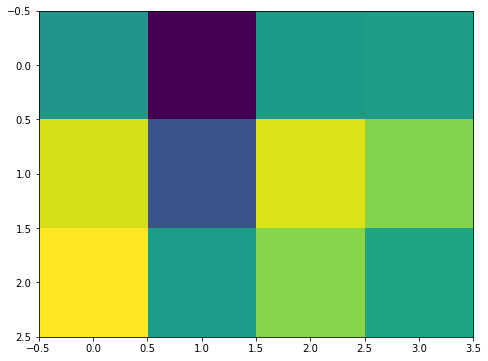

In [636]:
plt.imshow(w[0][:,2].reshape((3, 4)))
plt.show()

# Drawing a Keras model

In [637]:
#pip install pydot

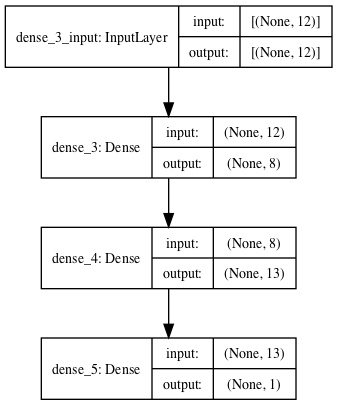

In [638]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model

model = Sequential()
model.add(Dense(activation = "elu", input_dim = 12, 
                     units = 8, kernel_initializer = "uniform"))
model.add(Dense(activation = "elu", units = 13, 
                     kernel_initializer = "uniform"))
model.add(Dense(activation = "sigmoid", units = 1, 
                     kernel_initializer = "uniform"))


plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [639]:
# Import turtle package
import turtle
 
turtle.speed(0)
turtle.pensize(5)

# Creating a turtle object(pen)
pen = turtle.Turtle()
  
# Defining a method to draw curve
def curve():
    for i in range(200):
  
        # Defining step by step curve motion
        pen.right(1)
        pen.forward(1)
  
# Defining method to draw a full heart
def heart():
  
    # Set the fill color to red
    pen.fillcolor('red')
  
    # Start filling the color
    pen.begin_fill()
  
    # Draw the left line
    pen.left(140)
    pen.forward(113)
  
    # Draw the left curve
    curve()
    pen.left(120)
  
    # Draw the right curve
    curve()
  
    # Draw the right line
    pen.forward(112)
  
    # Ending the filling of the color
    pen.end_fill()
  
# Defining method to write text
def txt():
  
    # Move turtle to air
    pen.up()
  
    # Move turtle to a given position
    pen.setpos(-68, 95)
  
    # Move the turtle to the ground
    pen.down()
  
    # Set the text color to lightgreen
    pen.color('black')
  
    # Write the specified text in 
    # specified font style and size
    pen.write("THANKS TO ALL my SPICED TEACHERS", font=(
      "Verdana", 12, "bold"))
  
  
# Draw a heart
heart()
  
# Write text
txt()
  
# To hide turtle
pen.ht()